In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import math as math
import datetime as dt
import json
import requests

r = requests.get('https://data.winnipeg.ca/resource/du7c-8488.json')

trapDF = pd.DataFrame(r.json())
#trapDF.shape

# This part changes 'no data' entries to NaN entries
for cols in list(trapDF.columns):
    for indx in trapDF.index:
        if trapDF.at[indx, cols]=='no data':
            trapDF.at[indx, cols]=np.NaN
# changing coun_date type
trapDF['count_date'] = pd.to_datetime(trapDF['count_date'])            

trapDF=trapDF.sort_values(by=['count_date'])

# changing everything else to date type
for cols in list(trapDF.columns):
    if cols!='count_date':
        trapDF[cols]=pd.to_numeric(trapDF[cols])
        
        
        
# separating data into years
# TrapDF is a dictionary, lookup by year
TrapDF={}
for year in range(2015,2022):
    TrapDF[year]=trapDF[trapDF['count_date'].dt.year==year]
    #TrapDF[year].reset_index(inplace=True,drop=True)
TrapDF[2021].head()

# Replace north_west_i to NWi
replace={}
for ud in ['north','south']:
    for lr in ['west', 'east']:
        for i in range(1,8):
            word=ud+'_'+lr+'_'+str(i)
            replace[word]=ud[0].capitalize()+lr[0].capitalize()+str(i)
            print(word, replace[word])
for let in 'abcdefghi':
    word='rural_'+let+let
    replace[word]=2*let.capitalize()
    print(word, replace[word])

for ud in ['north','south']:
    for lr in ['west', 'east']:
        word=ud+'_'+lr+'_'+'average'
        replace[word]=ud[0].capitalize()+lr[0].capitalize()+'_avg'
        print(word, replace[word])    
    
replace['count_date']='date'
replace['city_wide_daily_average']='city_avg'

for year in range(2015,2022):
    TrapDF[year].rename(columns=replace,inplace=True)
    TrapDF[year].set_index('date',inplace=True)
    
TrapDF[2021].head()

north_west_1 NW1
north_west_2 NW2
north_west_3 NW3
north_west_4 NW4
north_west_5 NW5
north_west_6 NW6
north_west_7 NW7
north_east_1 NE1
north_east_2 NE2
north_east_3 NE3
north_east_4 NE4
north_east_5 NE5
north_east_6 NE6
north_east_7 NE7
south_west_1 SW1
south_west_2 SW2
south_west_3 SW3
south_west_4 SW4
south_west_5 SW5
south_west_6 SW6
south_west_7 SW7
south_east_1 SE1
south_east_2 SE2
south_east_3 SE3
south_east_4 SE4
south_east_5 SE5
south_east_6 SE6
south_east_7 SE7
rural_aa AA
rural_bb BB
rural_cc CC
rural_dd DD
rural_ee EE
rural_ff FF
rural_gg GG
rural_hh HH
rural_ii II
north_west_average NW_avg
north_east_average NE_avg
south_west_average SW_avg
south_east_average SE_avg


C:\Users\andre\anaconda3\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,city_avg,trap_days,NW1,NW2,NW3,NW4,NW5,NW6,NW7,NW_avg,...,SW_avg,AA,BB,CC,DD,EE,FF,GG,HH,II
date,,,,,,,,,,,,,,,,,,,,,
2021-05-03,0,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,...,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-05-05,0,2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,...,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2021-05-07,0,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,...,0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-05-10,0,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,...,0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-05-12,0,2,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1,...,0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [23]:
col_list=['Date time', 'Maximum Temperature', 'Minimum Temperature', 'Temperature', 'Wind Chill', 'Heat Index', 'Precipitation', 'Wind Speed', 'Wind Direction', 'Wind Gust', 'Cloud Cover', 'Relative Humidity', 'Conditions']
WeathDF={}
for year in range(2015,2022):
    word='WeatherData\history_data_'+str(year)+'.csv'
    WeathDF[year]=pd.read_csv(word, usecols=col_list)
WeathDF[2015].head()

for year in range(2015,2022):
    WeathDF[year]['Date time'] = pd.to_datetime(WeathDF[year]['Date time'])            
    WeathDF[year]=WeathDF[year].sort_values(by=['Date time'])
# changing everything else to date type
for year in range(2015,2022):
    for cols in list(WeathDF[year].columns):
        if cols!='Date time' and cols!='Conditions':
            WeathDF[year][cols]=pd.to_numeric(WeathDF[year][cols])
replace={'Date time':'date', 'Maximum Temperature':'Max_T', 'Minimum Temperature':'Min_T', 'Temperature':'T', 'Relative Humidity':'Humidity'}
for year in range(2015,2022):
    WeathDF[year].rename(columns=replace,inplace=True)
    WeathDF[year].set_index('date',inplace=True)
WeathDF[2016].dtypes    

Max_T             float64
Min_T             float64
T                 float64
Wind Chill        float64
Heat Index        float64
Precipitation     float64
Wind Speed        float64
Wind Direction    float64
Wind Gust         float64
Cloud Cover       float64
Humidity          float64
Conditions         object
dtype: object

In [24]:
#url = 'https://www.energidataservice.dk/proxy/api/datastore_search?resource_id=nordpoolmarket&limit=5'
#response = requests.get(url)
feature_list=['InfoId', 'TrapLabel', 'Area', 'Coordinates_polygon']

LocList=[]
for let in 'ABCDEFGHI':
    LocList.append(let+let)
for let in ['NE','NW','SE','SW']:
    for num in '1234567':
        LocList.append(let+num)
print(LocList)

AreaLocMix=[]
f=json.load(open("JSON/adultMosquitoTrapArea.json"))
#print(f)

for line in f['features']:
    line_list=[]
    line_list.append(line['properties']['trapLocationInfoID'])
    line_list.append(line['properties']['trapLabel'])
    line_list.append(line['properties']['area'])
    line_list.append(line['geometry']['coordinates'])
    AreaLocMix.append(line_list)
#print(AreaLocMix)  
for i in range(len(AreaLocMix)):
    for j in range(len(AreaLocMix)):
        if j>i:
            if AreaLocMix[i][3][0]==AreaLocMix[j][3][0]:
                print(AreaLocMix[i][1],'=',AreaLocMix[j][1])

#print(AreaLocMix[10])
#print(AreaLocMix[11])
    
PolygonDF=[]    
for i in range(len(AreaLocMix)):
    long=[]
    lat=[]
    for point in AreaLocMix[i][3][0]:
        long.append(point[0])
        lat.append(point[1])
    PolygonDF.append(pd.DataFrame(list(zip(long,lat)), columns=['long', 'lat']))
print(PolygonDF[1].head())

AreaLoc={}
for i in range(len(AreaLocMix)):
    AreaLoc[AreaLocMix[i][1]]=AreaLocMix[i][3][0]
print(len(AreaLocMix))
#print(AreaLoc)

['AA', 'BB', 'CC', 'DD', 'EE', 'FF', 'GG', 'HH', 'II', 'NE1', 'NE2', 'NE3', 'NE4', 'NE5', 'NE6', 'NE7', 'NW1', 'NW2', 'NW3', 'NW4', 'NW5', 'NW6', 'NW7', 'SE1', 'SE2', 'SE3', 'SE4', 'SE5', 'SE6', 'SE7', 'SW1', 'SW2', 'SW3', 'SW4', 'SW5', 'SW6', 'SW7']
BB = CC
HH = II
        long        lat
0 -97.040258  50.016223
1 -97.038598  50.019433
2 -97.031871  50.026906
3 -97.108678  50.059985
4 -97.114842  50.063679
37


In [25]:
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon
## point=[x,y], LocIdent returns [loc_1,loc_2,...] list of closest locations to a point
def LocIdent(point):
    [x,y]=point
    pnt=Point(x,y)
    ans={}
    mmin=10 # choose very large
    for loc in LocList:
        coords=[]
        for i in range(len(AreaLoc[loc])):
            coords.append((AreaLoc[loc][i][0], AreaLoc[loc][i][1]))
        #print(coords)
        poly=Polygon(coords)
        if pnt.within(poly):
            mmin=0
            if 0 in ans:
                ans[0].append(loc)
            else:
                ans[0]=[loc]
        if mmin!=0:
            if poly.exterior.distance(pnt)<=mmin:
                mmin=poly.exterior.distance(pnt)
                if mmin in ans:
                    ans[mmin].append(loc)
                else:
                    ans[mmin]=[loc]
    return ans[mmin]
LocIdent([-97.2,49.9])

['NW4']

In [26]:
HelicDF={}
for year in [2020,2021]:
    HelicDF[year]=pd.read_csv('SprayingData/Helic'+str(year)+'.csv')
    HelicDF[year]['date'] = pd.to_datetime(HelicDF[year]['date'])            
    HelicDF[year].set_index('date',inplace=True)

In [27]:
HelicDF[2020].head()

,chemical_h,NE1_h,NE2_h,NE3_h,NE4_h,NE5_h,NE6_h,NE7_h,NW1_h,NW2_h,...,SE5_h,SE6_h,SE7_h,SW1_h,SW2_h,SW3_h,SW4_h,SW5_h,SW6_h,SW7_h
date,,,,,,,,,,,,,,,,,,,,,
2020-04-22,['MT'],0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,1
2020-04-23,['MT'],0,0,0,1,1,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
2020-04-24,['MT'],0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2020-04-25,['MT'],0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-04-26,['MT'],0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
LocList.append('city_avg')
for let in ['NE','NW','SE','SW']:
    LocList.append(let+"_avg")

TrWtDF={}
for year in range(2015,2022):
    TrWtDF[year]={}
    for loc in LocList:
        TrWtDF[year][loc]=pd.concat([TrapDF[year][loc], WeathDF[year]], axis=1, join="outer")
        
TrWtDF[2017]['NW1']

,NW1,Max_T,Min_T,T,Wind Chill,Heat Index,Precipitation,Wind Speed,Wind Direction,Wind Gust,Cloud Cover,Humidity,Conditions
date,,,,,,,,,,,,,
2017-05-01,NaN,18.1,4.1,12.2,NaN,NaN,0.30,15.9,62.54,38.9,4.3,32.76,Rain
2017-05-02,NaN,18.3,7.0,13.3,6.9,NaN,0.00,7.8,127.96,27.7,5.7,42.02,Clear
2017-05-03,1.0,18.1,9.3,13.6,8.7,NaN,0.94,12.0,209.25,37.1,4.2,47.13,Rain
2017-05-04,NaN,20.9,7.6,15.0,NaN,NaN,0.00,10.3,167.58,33.5,3.3,40.48,Clear
2017-05-05,0.0,22.2,11.1,17.0,NaN,NaN,0.00,19.3,112.29,48.2,1.6,32.99,Clear
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-09-26,NaN,9.8,8.5,9.2,8.4,NaN,8.85,5.8,191.21,NaN,4.7,89.53,Rain
2017-09-27,1.0,18.7,5.1,11.7,4.4,NaN,0.20,9.9,232.46,30.4,2.1,75.64,Rain
2017-09-28,NaN,15.6,9.2,12.7,8.1,NaN,0.00,15.7,287.71,37.1,24.2,66.10,Clear


In [29]:
loc='NW1'
par_list=[loc, 'Min_T','Precipitation', 'Humidity', 'Conditions']
TestDF=pd.concat([TrapDF[2015][loc], WeathDF[2015]], axis=1, join="outer")
print(TestDF.shape)
for year in range(2016,2022):
    TestDF=TestDF.append(pd.concat([TrapDF[year][loc], WeathDF[year]], axis=1, join="outer"))
    print(TestDF.shape)
TestDF['Conditions'] = TestDF['Conditions'].map({'Rain' :1, 'Rain, Partially cloudy':1, 'Clear' :0})

TestDF=TestDF[par_list]
#par_list.remove(loc)

TestDF['Mosquito_cutoff']=TestDF[loc] > 15
TestDF['Mosquito_cutoff']=TestDF['Mosquito_cutoff']*1
TestDF.head()


(153, 13)
(306, 13)
(459, 13)
(612, 13)
(765, 13)
(919, 13)
(1027, 13)


,NW1,Min_T,Precipitation,Humidity,Conditions,Mosquito_cutoff
date,,,,,,
2015-05-01,NaN,6.7,0.64,54.19,1.0,0
2015-05-02,NaN,11.2,0.00,32.17,0.0,0
2015-05-03,NaN,6.5,0.00,56.47,0.0,0
2015-05-04,1.0,4.2,0.00,51.98,0.0,0
2015-05-05,NaN,8.0,0.00,25.24,0.0,0


In [30]:
length=7
for i in range(length):    
    for cols in par_list:
        TestDF[cols+'_(-'+str(i+1)+')']=TestDF[cols]

for i in range(length):    
    TestDF['Min_T_(-'+str(i)+')']=TestDF['Min_T'].shift(periods=i, freq=None, axis=0) 
TestDF.tail(30)

,NW1,Min_T,Precipitation,Humidity,Conditions,Mosquito_cutoff,NW1_(-1),Min_T_(-1),Precipitation_(-1),Humidity_(-1),...,Min_T_(-6),Precipitation_(-6),Humidity_(-6),Conditions_(-6),NW1_(-7),Min_T_(-7),Precipitation_(-7),Humidity_(-7),Conditions_(-7),Min_T_(-0)
date,,,,,,,,,,,,,,,,,,,,,
2021-07-18,NaN,19.1,0.00,53.82,0.0,0,NaN,20.5,0.00,53.82,...,20.3,0.00,53.82,0.0,NaN,19.1,0.00,53.82,0.0,19.1
2021-07-19,3.0,18.7,10.80,74.43,1.0,0,3.0,19.1,10.80,74.43,...,17.7,10.80,74.43,1.0,3.0,18.7,10.80,74.43,1.0,18.7
2021-07-20,NaN,16.7,6.20,82.76,1.0,0,NaN,18.7,6.20,82.76,...,15.7,6.20,82.76,1.0,NaN,16.7,6.20,82.76,1.0,16.7
2021-07-21,1.0,18.7,6.35,82.49,1.0,0,1.0,16.7,6.35,82.49,...,18.5,6.35,82.49,1.0,1.0,18.7,6.35,82.49,1.0,18.7
2021-07-22,NaN,18.9,0.12,71.95,1.0,0,NaN,18.7,0.12,71.95,...,19.6,0.12,71.95,1.0,NaN,18.9,0.12,71.95,1.0,18.9
2021-07-23,1.0,23.3,0.00,53.37,0.0,0,1.0,18.9,0.00,53.37,...,20.5,0.00,53.37,0.0,1.0,23.3,0.00,53.37,0.0,23.3
2021-07-24,NaN,17.1,0.00,40.62,0.0,0,NaN,23.3,0.00,40.62,...,19.1,0.00,40.62,0.0,NaN,17.1,0.00,40.62,0.0,17.1
2021-07-25,NaN,18.1,0.00,36.53,0.0,0,NaN,17.1,0.00,36.53,...,18.7,0.00,36.53,0.0,NaN,18.1,0.00,36.53,0.0,18.1
2021-07-26,3.0,18.6,0.06,47.85,1.0,0,3.0,18.1,0.06,47.85,...,16.7,0.06,47.85,1.0,3.0,18.6,0.06,47.85,1.0,18.6


In [31]:
TestDF.dropna(subset=[loc],inplace=True)
for i in range(length):
    for cols in par_list:
        TestDF.dropna(subset=[cols+'_(-'+str(i+1)+')'],inplace=True)
        TestDF.dropna(subset=[cols],inplace=True)
TestDF.shape

(497, 42)

In [11]:
print(par_list)

['Min_T', 'Precipitation', 'Humidity', 'Conditions']


In [12]:
# Regression Model
test_list=[]
for word in par_list:
    test_list.append(word)
for word in par_list:
    for i in range(length):
        test_list.append(word+'_(-'+str(i+1)+')')

test_list.remove('NW1')
print(test_list)

['Min_T', 'Precipitation', 'Humidity', 'Conditions', 'NW1_(-1)', 'NW1_(-2)', 'NW1_(-3)', 'NW1_(-4)', 'NW1_(-5)', 'NW1_(-6)', 'NW1_(-7)', 'Min_T_(-1)', 'Min_T_(-2)', 'Min_T_(-3)', 'Min_T_(-4)', 'Min_T_(-5)', 'Min_T_(-6)', 'Min_T_(-7)', 'Precipitation_(-1)', 'Precipitation_(-2)', 'Precipitation_(-3)', 'Precipitation_(-4)', 'Precipitation_(-5)', 'Precipitation_(-6)', 'Precipitation_(-7)', 'Humidity_(-1)', 'Humidity_(-2)', 'Humidity_(-3)', 'Humidity_(-4)', 'Humidity_(-5)', 'Humidity_(-6)', 'Humidity_(-7)', 'Conditions_(-1)', 'Conditions_(-2)', 'Conditions_(-3)', 'Conditions_(-4)', 'Conditions_(-5)', 'Conditions_(-6)', 'Conditions_(-7)']


In [14]:
targets = TestDF['Mosquito_cutoff']

inputs = TestDF[test_list]

In [15]:
#random forest
#from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

train, test, train_labels, test_labels = train_test_split(inputs, targets, stratify = targets, test_size=0.3, random_state=None)


In [16]:
#n_estimators= number of trees
model = RandomForestClassifier(n_estimators=20, random_state=None, max_features = 'sqrt', n_jobs=-1, verbose = 1)

model.fit(train, train_labels)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    0.0s finished


RandomForestClassifier(max_features='sqrt', n_estimators=20, n_jobs=-1,
                       verbose=1)

In [17]:
train_rf_predictions = model.predict(train)
train_rf_probs = model.predict_proba(train)[:, 1]

rf_predictions = model.predict(test)
rf_probs = model.predict_proba(test)[:, 1]

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  20 out of  20 | elapsed:    0.0s finished


In [18]:
from sklearn.metrics import precision_score, recall_score, roc_auc_score, roc_curve
def evaluate_model(predictions, probs, train_predictions, train_probs):
    """Compare machine learning model to baseline performance.
    Computes statistics and shows ROC curve."""
    
    baseline = {}
    
    baseline['recall'] = recall_score(test_labels, [1 for _ in range(len(test_labels))])
    baseline['precision'] = precision_score(test_labels, [1 for _ in range(len(test_labels))])
    baseline['roc'] = 0.5
    
    results = {}
    
    results['recall'] = recall_score(test_labels, predictions)
    results['precision'] = precision_score(test_labels, predictions)
    results['roc'] = roc_auc_score(test_labels, probs)
    
    train_results = {}
    train_results['recall'] = recall_score(train_labels, train_predictions)
    train_results['precision'] = precision_score(train_labels, train_predictions)
    train_results['roc'] = roc_auc_score(train_labels, train_probs)
    
    for metric in ['recall', 'precision', 'roc']:
        print(f'{metric.capitalize()} Baseline: {round(baseline[metric], 2)} Test: {round(results[metric], 2)} Train: {round(train_results[metric], 2)}')
    
    # Calculate false positive rates and true positive rates
    base_fpr, base_tpr, _ = roc_curve(test_labels, [1 for _ in range(len(test_labels))])
    model_fpr, model_tpr, _ = roc_curve(test_labels, probs)

    plt.figure(figsize = (8, 6))
    plt.rcParams['font.size'] = 16
    
    # Plot both curves
    plt.plot(base_fpr, base_tpr, 'b', label = 'baseline')
    plt.plot(model_fpr, model_tpr, 'r', label = 'model')
    plt.legend();
    plt.xlabel('False Positive Rate'); plt.ylabel('True Positive Rate'); plt.title('ROC Curves');

Recall Baseline: 1.0 Test: 0.95 Train: 0.99
Precision Baseline: 0.29 Test: 0.95 Train: 1.0
Roc Baseline: 0.5 Test: 0.99 Train: 1.0


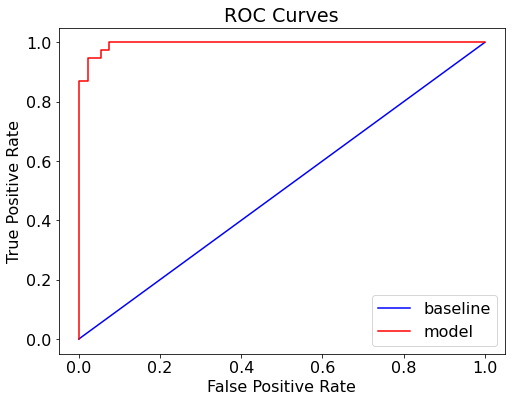

In [19]:
evaluate_model(rf_predictions, rf_probs, train_rf_predictions, train_rf_probs)

Confusion matrix, without normalization
[[91  2]
 [ 2 36]]


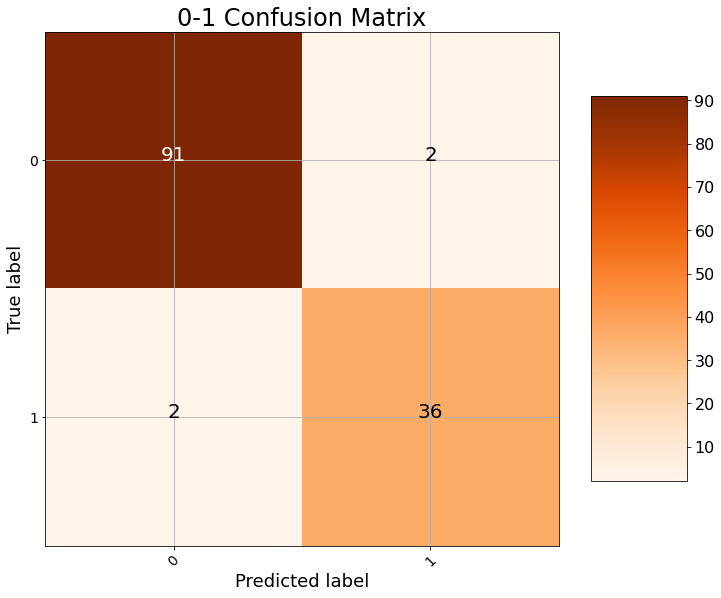

In [21]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Oranges):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    Source: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.figure(figsize = (10, 10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, size = 24)
    plt.colorbar(aspect=4)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, size = 14)
    plt.yticks(tick_marks, classes, size = 14)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    
    # Labeling the plot
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), fontsize = 20,
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
        
    plt.grid(None)
    plt.tight_layout()
    plt.ylabel('True label', size = 18)
    plt.xlabel('Predicted label', size = 18)

cm = confusion_matrix(test_labels, rf_predictions)
plot_confusion_matrix(cm, classes = ['0', '1'],
                      title = '0-1 Confusion Matrix')

In [20]:
fi_model = pd.DataFrame({'feature': test_list,
                   'importance': model.feature_importances_}).\
                    sort_values('importance', ascending = False)
fi_model.head(10)

,feature,importance
4,Min_T_(-1),0.077177
5,Min_T_(-2),0.070418
6,Min_T_(-3),0.062180
9,Min_T_(-6),0.058110
7,Min_T_(-4),0.057810
21,Humidity_(-4),0.052621
0,Min_T,0.052004
19,Humidity_(-2),0.051338
10,Min_T_(-7),0.048918
22,Humidity_(-5),0.047518
